# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Exploratory Data Analysis

First import the necessary packages and data.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
from matplotlib import mlab
import seaborn as sns
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

Let's check to see what the data looks like and whether there are any missing values.

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Since we have heart rate data as well, it doesn't hurt to check whether there is any relationship between it and the temperature data.  A scatter plot is a good way to start analyzing that.

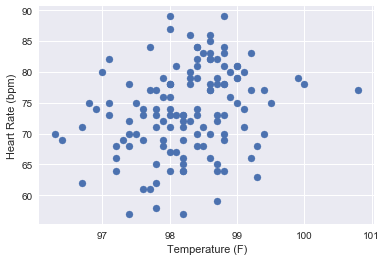

In [3]:
plt.scatter(df.temperature,df.heart_rate)
plt.xlabel('Temperature (F)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

There doesn't appear to be a relationship between the two.  That can be further quantified by computing the correlation between them.  We expect it to have a small absolute value.

In [4]:
np.corrcoef(df.temperature,df.heart_rate)

array([[1.       , 0.2536564],
       [0.2536564, 1.       ]])

There is not a strong relationship between body temperature and heart rate, but that is okay since heart rate was never asked about anyway.  What about temperature and gender?

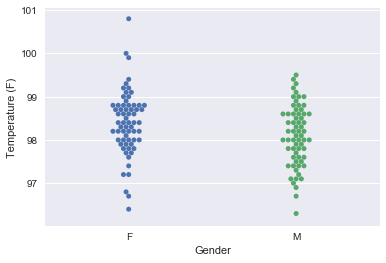

In [5]:
sns.swarmplot(df.gender,df.temperature)
plt.xlabel('Gender')
plt.ylabel('Temperature (F)')
plt.show()

It appears that there are more female outliers than there are male ones.  Excluding the outliers, women look like they have a smaller variance and higher mean.

Let's check this quantitatively.  To do so, first separate the data by gender, then compute statistics on each.

In [6]:
women=df[df.gender=='F']
men=df[df.gender=='M']

In [7]:
women.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [8]:
men.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

Indeed, women do have a higher mean and median, but their variance is larger, likely due to the outliers.  A box plot comparison can help us visualize this information.

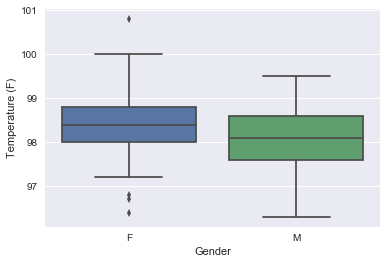

In [9]:
sns.boxplot(df.gender,df.temperature)
plt.xlabel('Gender')
plt.ylabel('Temperature (F)')
plt.show()

The box plot ignore outliers.  When doing this, women clearly have higher temperatures overall, and their interquartile range is in fact smaller.

### Exercises

**1) Is the distribution of body temperature normal?**

To answer this question, plot a histogram of body temperatures and overlay it with a normal curve of the sample mean and variance.

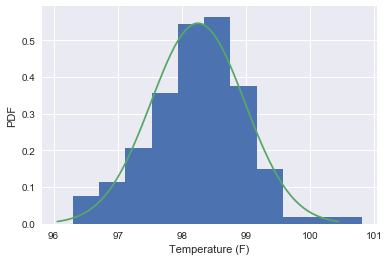

In [10]:
# Plot the temperature histogram:
plt.hist(df.temperature,bins=np.int(np.sqrt(len(df))),normed=True)

# Overlay the normal pdf:
mu=np.mean(df.temperature)
sigma=np.std(df.temperature)
x=np.linspace(mu-3*sigma,mu+3*sigma,100)
plt.plot(x,mlab.normpdf(x,mu,sigma))

plt.xlabel('Temperature (F)')
plt.ylabel('PDF')
plt.show()

While temperature does appear roughly normal, this graphic suffers from binning bias, as the choice of 11 bins was somewhat arbitrary.  Some bin choices look closer to normal than others.  A smoother and unbiased visual can be obtained by instead overlaying the cumulative distribution functions.

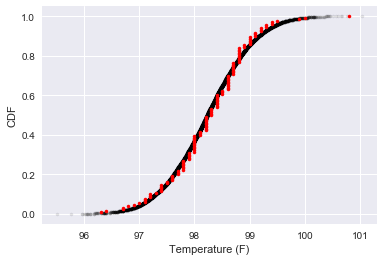

In [11]:
# Plot the normal cdf:
np.random.seed(0)
samples=np.random.normal(mu,sigma,10000)
x_theor=np.sort(samples)
y_theor=np.arange(1,len(x_theor)+1)/len(x_theor)
plt.plot(x_theor,y_theor,marker='.',linestyle='none',alpha=.1,color='k')

# Overlay the the temperature cdf:
x=np.sort(df.temperature)
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none',color='r')

plt.xlabel('Temperature (F)')
plt.ylabel('CDF')
plt.show()

This more strongly confirms that yes, temperature distribution is normal.

**2) Is the sample size large?  Are the observations independent?**

In order to apply the central limit theorem, it is commonly accepted that `n=40` is a sufficiently large sample size.  Since we have 130 observations, we have enough.  Even splitting the observation by gender, there are still 65 each, which is sufficient.

There is no readme accompanying the data to describe how it was obtained.  One can only assume that the data points are independent, i.e. taken from different individuals.

**3) Is the true population mean really 98.6 degrees F?**

This question can be addressed using a one sample *t*-test, as we are trying to determine whether a single population has a mean equal to a fix value.  On the other hand, a two sample *t*-test compares whether two populations have the same mean, such as comparing the men to the women.

Furthermore, it is fine to use the *t* statistic at all in this case because the data is continuous, approximately normally distributed, independent, and has no major outliers.

Using the *z* statistic requires knowing the standard deviation of the population (*not* the sample), which we do not know, so it cannot accurately be used.

The sample mean is approximately 98.25.  The *p* values of the *t*-test measures how likely it is that a sample of 130 temperatures would have this mean assuming the true population mean is 98.6.  We will take `p=.05` to be statistically significant.

In [12]:
# Compute a one sample t test:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The resulting *p*-value of `p=2.4e-07` shows that it is highly unlike that 98.6 is the true population mean.

To compute the *p*-value using the *z* statistic, we will estimate the population standard deviation by assuming it is equal to the sample deviation.

In [13]:
# Compute the z score:
z=(np.mean(df.temperature)-98.6)/(np.std(df.temperature)/np.sqrt(len(df.temperature)))

# Compute the associated p value:
stats.norm.cdf(z)

2.1761575829410943e-08

With `p=2.2e-08`, the conclusion is the same: we have a statistically significant result and should reject the null hypothesis that the average population temperature is 98.6 F.  These values are so close to 0 that there should be almost no doubt.

**4) Draw a small sample of size 10 from the data and repeat both tests.**

With a smaller sample size, the *z* test will not be accurate.  It requires at least 30 to 40 samples in order to invoke the CLT, so only 10 samples should yield extremely inaccurate results.  On the other hand, the *t* test uses the number of samples as an explicit argument and can therefore accurately compensate for small sample sizes.

In [14]:
# Draw a smaller sample of size 10 without replacement:
np.random.seed(0)
few_temps=np.random.choice(df.temperature,10,replace=False)

In [15]:
# Compute a one sample t test:
stats.ttest_1samp(few_temps,98.6)

Ttest_1sampResult(statistic=-1.624999999999938, pvalue=0.13860835307134423)

In [16]:
# Compute the z score:
z=(np.mean(few_temps)-98.6)/(np.std(few_temps)/np.sqrt(len(few_temps)))

# Compute the associated p value:
stats.norm.cdf(z)

0.04336543241377733

In this case, the *t* test says the results are not significant while the *z* test says it is significant.  Let's further analyze this.

In [17]:
np.mean(few_temps)

98.34

The mean of this smaller sample is 98.34 compared to 98.25 for the full sample.  To say that this indicates the true mean is not 98.6 with a sample size of only 10 is ridiculous.  Even though we know from the larger sample size that 98.6 is in fact wrong, we should not be able to conclude this from a sample of size 10 with such a close mean.  The *z* statistic should not be used with small samples.

**5) At what temperature should we consider someone's temperature to be "abnormal"?**

The answer to this question is dependent on the definition of abnormal.  Is normal only cosidered to be the temperature of a perfectly healthy subject?  Does normal include subjects who are only mildly sick with a slightly elevated temperature?  Answering these questions would require more outside information.  For our purposes, we will take normal to mean perfectly healthy and assume all data points are from healthy subjects.

Because humans vary widely and yet are mostly healthy, we will use a very lage confidence interval, say 99.9%.  Since the true standard deviation is not known, it is best to use a *t* test with the standard error of measurement.

In [18]:
confidence=stats.t.interval(.999,len(df.temperature)-1,
                 loc=np.mean(df.temperature),scale=stats.sem(df.temperature))
print('confidence interval: ' + str(confidence))
print('range of error: ' + str(confidence[1]-confidence[0]))

confidence interval: (98.03268265832011, 98.46577888014146)
range of error: 0.43309622182134433


Even with this large of a percentage confidence interval, the range of normal temperatures is still very small: the margin of error is only .433 degrees F.  This seems awfully restrictive.

In [19]:
# Number of samples outside this interval
print(len(df[(df.temperature<confidence[0]) | (df.temperature>confidence[1])]))

# Percent of samples outside this interval:
print((len(df[(df.temperature<confidence[0]) | (df.temperature>confidence[1])]))
      /len(df.temperature))

103
0.7923076923076923


It turns out the vast majority of samples fell outside this range.  Recall that the standard deviation of the samples was .73 (which is larger that the margin of error!), so it makes sense that most values fall outside the interval.

To settle this incongruence, recall that this confidence interval is simply a measurement of where the mean lies.  It says nothing about where individual points may lie.

Analyzing abnormal temperatures would likely require a much larger sample size as well as additional information such as whether the person was seriously ill, etc.

**6) Is there a significant difference between males and females in normal temperature?**

First compute the respective 95% confidence intervals of the mean temperature of each gender.  Recall that we already divided the data by gender earlier.

In [20]:
w_confidence=stats.t.interval(.95,len(women.temperature)-1,
        loc=np.mean(women.temperature),scale=stats.sem(women.temperature))
print('women confidence interval: ' + str(w_confidence))

m_confidence=stats.t.interval(.95,len(men.temperature)-1,
        loc=np.mean(men.temperature),scale=stats.sem(men.temperature))
print('men confidence interval: ' + str(m_confidence))

women confidence interval: (98.20961890918223, 98.57807339851003)
men confidence interval: (97.93147218445705, 98.27775858477375)


Since there is minimal overlap betweent the two intervals, it seems unlikely that male and female populations have the same mean temperature.  We can quantify this using a two sample *t* test.  Note that this assumes equal variance between men and women.  Women have a slightly higher variance in this data set, but the values are close enough to suffice.

In [21]:
stats.ttest_ind(women.temperature,men.temperature)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

The *p* value is less .05, so we reject the null hypothesis that mean and women have the same mean temperature.  If we are concerned about differing varaitions, we can repeat the previous calculation negating that assumption, thereby using Welch's *t*-test instead of Student's *t*-test.

In [22]:
stats.ttest_ind(women.temperature,men.temperature,equal_var=False)

Ttest_indResult(statistic=2.285434538165611, pvalue=0.023938264182934196)

The result is a nearly identical *p* value, so we were likely fine assuming equal variance.  Either way, the null hypothesis is rejected.

### Summary

To conclude, body temperature is roughly normally distributed among humans.  The data indicates that the mean population temperature is almost certainly not the intially reported 98.6 degrees F.  Rather, it is more likely between 98.0 and 98.4 degrees F.  However, this does not mean that a temperature outside of this range is abnormal, as nearly 80% of the data points were outside this range.  The mean temperatures of men and women differed in our sample by .3 degrees F, and with a *p* value of .024 using a two sample *t* test, it seems likely that men and women really do have different average temperatures.